In [70]:
import numpy as np
import pandas as pd

In [71]:
from sktime.utils.plotting import plot_series

df = pd.read_csv('Data_Translated', sep=';')
df.head()

,Date,ABS_Value,Freq
0,January 2018,1810608,0.023
1,February 2018,2115137,0.027
2,March 2018,2107574,0.025
3,April 2018,1932288,0.025
4,May 2018,2175195,0.029


In [86]:
abs_series = pd.DataFrame(df['ABS_Value'])
freq_series = pd.DataFrame(df['Freq'])
freq_series.index = pd.DatetimeIndex(df["Date"])
abs_series.index = pd.DatetimeIndex(df["Date"])

In [87]:
freq_series.head()

,Freq
Date,
2018-01-01,0.023
2018-02-01,0.027
2018-03-01,0.025
2018-04-01,0.025
2018-05-01,0.029


In [74]:
abs_series.head()

,ABS_Value
Date,
2018-01-01,1810608
2018-02-01,2115137
2018-03-01,2107574
2018-04-01,1932288
2018-05-01,2175195


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Freq'>)

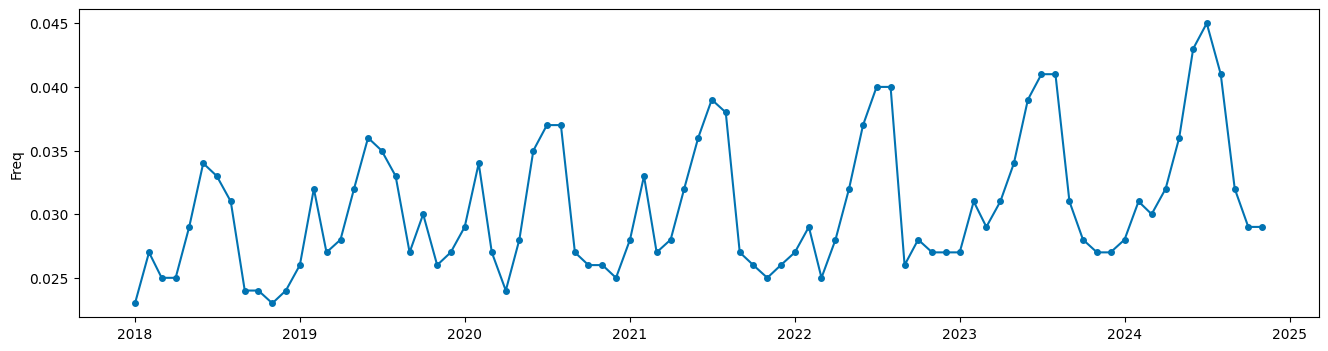

In [75]:
plot_series(freq_series)

In [76]:
from sktime.split import temporal_train_test_split

Сначала всё для absolute values

In [77]:
train_obs = int(round(len(abs_series) * 0.7, 0))

In [78]:
y_train, y_test = temporal_train_test_split(abs_series, train_size = train_obs)

In [85]:
y_train.head(), y_test.head()

(            ABS_Value
 Date                 
 2018-01-01    1810608
 2018-02-01    2115137
 2018-03-01    2107574
 2018-04-01    1932288
 2018-05-01    2175195,
             ABS_Value
 Date                 
 2022-11-01    3388061
 2022-12-01    3400052
 2023-01-01    3361809
 2023-02-01    3519616
 2023-03-01    3628094)

3 пункт начинается отсюда

In [80]:
from statsmodels.tsa.seasonal import MSTL

In [90]:
abs_model = MSTL(y_train["ABS_Value"], periods=12)

In [93]:
res_y = abs_model.fit()

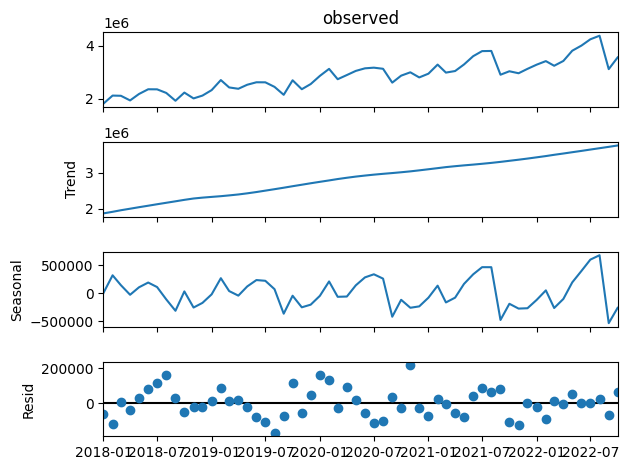

In [94]:
ax = res_y.plot()

In [88]:
z_train, z_test = temporal_train_test_split(freq_series, train_size = train_obs)

In [89]:
z_train.head(), z_test.head()

(             Freq
 Date             
 2018-01-01  0.023
 2018-02-01  0.027
 2018-03-01  0.025
 2018-04-01  0.025
 2018-05-01  0.029,
              Freq
 Date             
 2022-11-01  0.027
 2022-12-01  0.027
 2023-01-01  0.027
 2023-02-01  0.031
 2023-03-01  0.029)

In [99]:
freq_model = MSTL(z_train["Freq"], periods=12)

In [100]:
res_z = freq_model.fit()

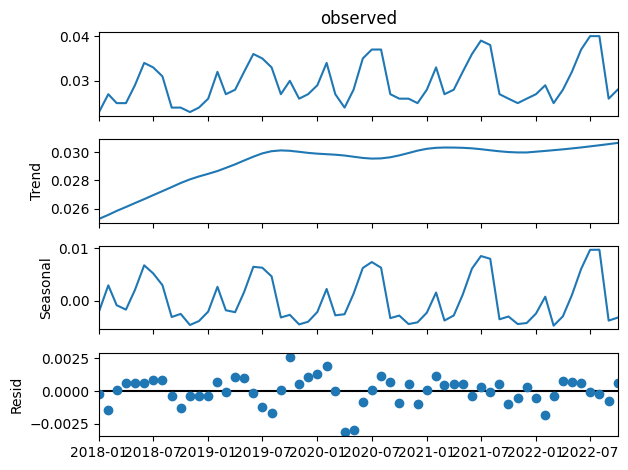

In [101]:
bx = res_z.plot()